# Backtrack Testbed Notebook

Short notebook to test Bryans functions.

In [1]:
# Standard library
import sys

import numpy as np
import matplotlib.pyplot as plt
# Data manipulation and analysis
import xarray as xr

In [2]:
sys.path.insert(1, '../sealsml')

# Random u and v data

In [3]:
# Set the number of examples
num_examples = 100

# Generate random u and v components using a normal distribution with mean 0 and standard deviation 5
u_data = np.random.normal(loc=0, scale=5, size=num_examples)
v_data = np.random.normal(loc=0, scale=5, size=num_examples)

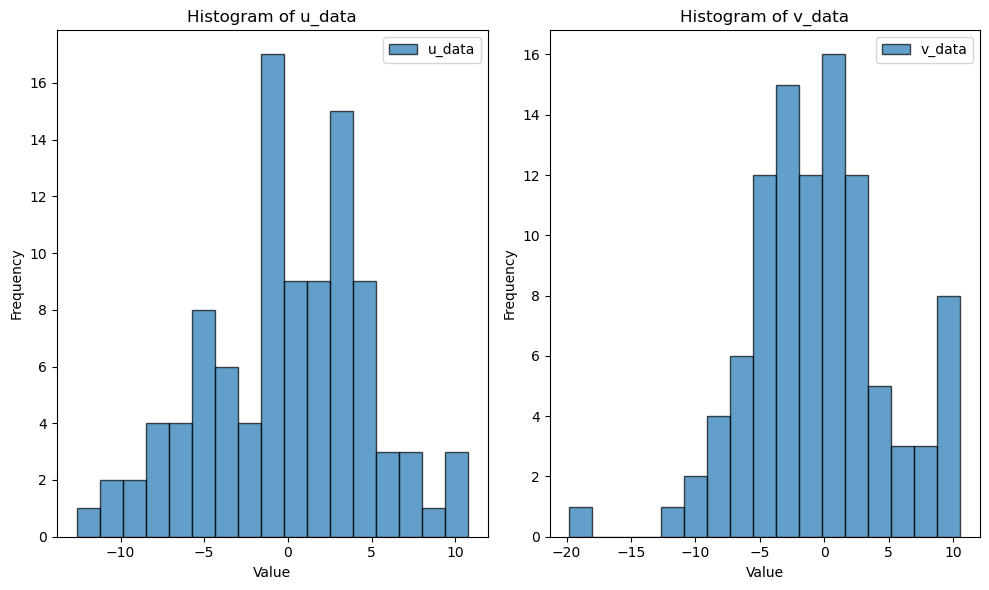

In [4]:
n_bins = 17

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create the histograms
ax1.hist(u_data, bins=n_bins, edgecolor='black', alpha=0.7, label='u_data')
ax2.hist(v_data, bins=n_bins, edgecolor='black', alpha=0.7, label='v_data')

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of u_data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of v_data')

# Add legend
ax1.legend()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Let's compare to MetPy Calc

In [5]:
from backtrack import polar

In [20]:
import metpy

from metpy.calc import wind_direction
from metpy.calc import wind_speed

from metpy.units import units

In [7]:
angle, speed = polar(u_data,v_data)

In [8]:
wind_dir = wind_direction(u_data*units("m/s"), v_data*units("m/s"))

wind_speed = wind_speed(u_data*units("m/s"), v_data*units("m/s"))

In [9]:
if np.allclose(speed, wind_speed.magnitude, rtol=1e-6):  # Relative tolerance of 1e-4
    print("Arrays match within 6 decimal places!")
else:
    print("Arrays do not match within 6 decimal places.")

Arrays match within 6 decimal places!


Looks like the speeds match

In [10]:
if np.allclose(angle, wind_dir.magnitude, rtol=1e-6):  # Relative tolerance of 1e-4
    print("Arrays match within 6 decimal places!")
else:
    print("Arrays do not match within 6 decimal places.")

Arrays do not match within 6 decimal places.


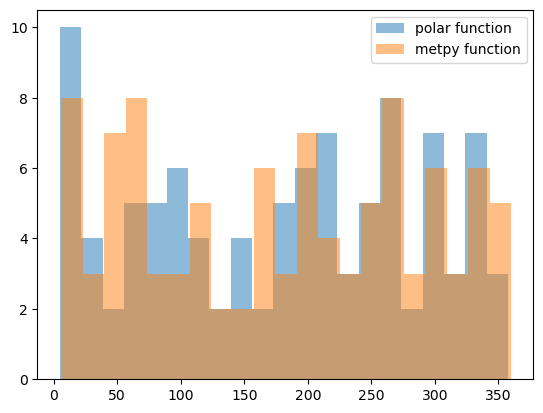

In [11]:
plt.hist(angle,    bins=21, alpha=0.5, label='polar function')
plt.hist(wind_dir, bins=21, alpha=0.5, label='metpy function')
plt.legend()

Let's test a pure east case

In [12]:
angle = np.rad2deg(np.arctan2(0, 10))
angle

0.0

In [13]:
wind_dir = wind_direction(10*units("m/s"), 0*units("m/s"))
wind_dir

array(270.) <Unit('degree')>

If we want to do this the oceanographic way:

In [14]:
wind_dir = wind_direction(10*units("m/s"), 0*units("m/s"), convention='to')
wind_dir

array(90.) <Unit('degree')>

From the north:

In [15]:
wind_dir = wind_direction(0*units("m/s"), -15*units("m/s"))
wind_dir

array(360.) <Unit('degree')>

## 1. For the polar function, I reccomend replacing it with the MetPy function, as it will follow the convention for most atmospheric scienctists and matches the current azimuth function to have 0/360 as North.  It will also be less code to maintain and test :)

Now let's test the polar 2D function

In [16]:
u_reshaped = u_data.reshape(10,10)
v_reshaped = v_data.reshape(10,10)

In [17]:
wind_dir_2d = wind_direction(u_reshaped*units("m/s"), v_reshaped*units("m/s"))
wind_dir_2d.magnitude

array([[196.04379718, 324.54862828, 196.32646878, 199.01029251,
         54.97375664,   8.91341861, 249.41948201, 339.28590724,
        166.45721209, 356.64403721],
       [220.04344434, 178.66289484, 262.36471655, 166.68538589,
        260.51388409,  69.09731402, 301.14185191, 307.34769789,
        249.50334069,  23.33639214],
       [331.94713792, 235.55932507, 317.31808019,  91.61424352,
         30.38068043, 300.59551455,  73.32468858, 253.22745347,
        294.66378632, 335.36849996],
       [333.62011743,  84.85764399,  15.75924417,  45.62102362,
        210.1425185 , 265.0949119 , 113.33855692,  47.59157416,
        181.62947023, 289.41828759],
       [245.01882551, 177.23790278,  96.4405006 ,  42.7681377 ,
        161.24018109,  14.13640011,  56.05390222, 314.60664482,
         67.30888665, 274.18875392],
       [ 26.97152063,   9.92467037,  13.71315899,  70.46025447,
         81.99062144, 251.01398963,   6.99047937, 123.19190902,
         72.98606196, 272.26807025],
       [35

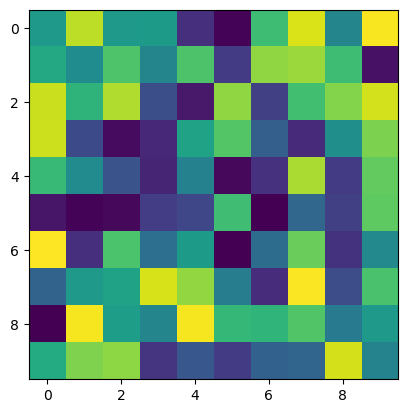

In [23]:
plt.imshow(wind_dir_2d)

In [21]:
wind_speed_2d = wind_speed(u_reshaped*units("m/s"), 
                           v_reshaped*units("m/s"))

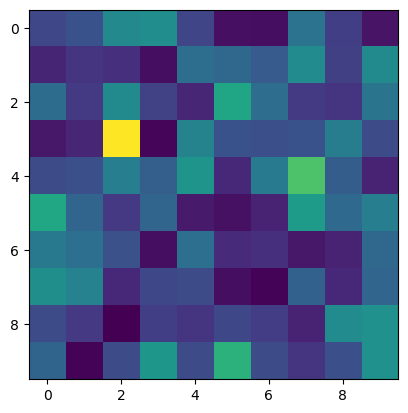

In [22]:
plt.imshow(wind_speed_2d)

## 2. For polar 2D, I reccomend using MetPy functions again as it does not require use of indicies for 2D arrays, and will match single point calculations